In [1]:
import pickle
import pandas
import numpy as np
import matplotlib.pyplot as plt

filename = 'idyom.txt'

from numpy import genfromtxt
data = genfromtxt(filename, delimiter=',')

columns = list(pandas.read_csv(filename).columns)

In [2]:
def get_mission(mission_id):
    return data[data[:,1] == mission_id+1]

missions = np.array([get_mission(i) for i in np.arange(1000)])

action_column = columns.index("action")
entropy_column = columns.index('entropy')
ic_column = columns.index('information.content')

def calc_ics(d):
    return d[:,ic_column]

ics = np.array([calc_ics(m) for m in missions])

def calc_entropies(d):
    return d[:,entropy_column]

entropies = np.array([calc_entropies(m) for m in missions])
entropy_diff = np.array([np.diff(es) for es in entropies])
max_entropy_diff = np.array([np.argmax(eds[1:-1])+2 for eds in entropy_diff])

eics = np.array([e/ic for (e,ic) in zip(entropies,ics)])
max_eics = np.array([np.argmax(eic[1:-1])+1 for eic in eics])

def get_actions(d):
    return np.array([int(d[i,action_column]) for i in np.arange(len(d))])

actions = np.array([get_actions(m) for m in missions])

def find_pickups(acns):
    return np.where(acns == 4)

pickups = np.array([find_pickups(acns)[0][0] for acns in actions])    

In [3]:
def entropy_plot(id):
    e = entropies[id]
    acns = actions[id]
    pu = pickups[id]
    me = max_entropy_diff[id]
    
    plt.plot(e)
    plt.scatter([pu],[e[pu]],marker='X',color='r')
    plt.scatter([me],[e[me]],marker='x',color='b')
    ax = plt.gca()
    ax.set_xticks(np.arange(len(acns)))
    ax.set_xticklabels(acns)
    plt.xlabel('action')
    plt.ylabel('entropy')
    
def eic_plot(id):
    ic = ics[id]
    e = entropies[id]
    acns = actions[id]
    pu = pickups[id]
    eic = e / ic
    meic = max_eics[id]

    
    plt.plot(eic)
    plt.scatter([pu],[eic[pu]],marker='X',color='r')
    plt.scatter([meic],[eic[meic]],marker='x',color='b')
    ax = plt.gca()
    ax.set_xticks(np.arange(len(acns)))
    ax.set_xticklabels(acns)
    plt.xlabel('action')
    plt.ylabel('e/ic')

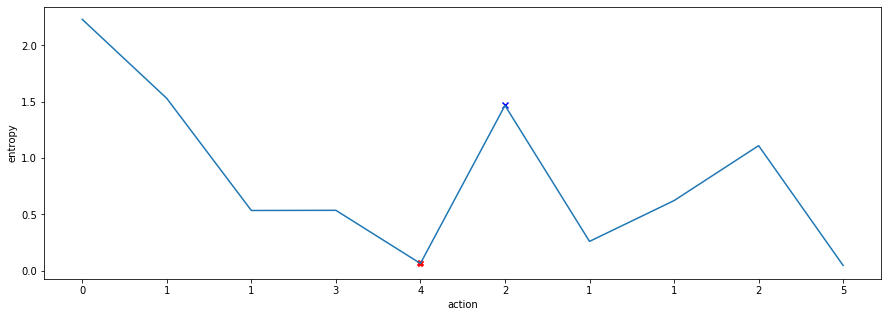

In [4]:
mission_id = 1
plt.figure(figsize=(15,5))
entropy_plot(mission_id)

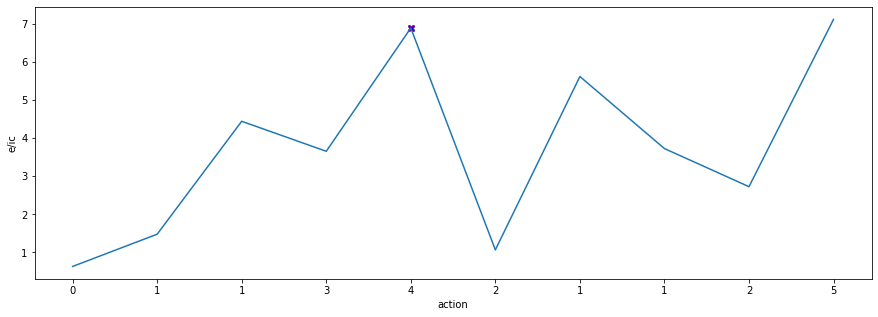

In [5]:
plt.figure(figsize=(15,5))
eic_plot(mission_id)

In [6]:
len(np.where([x==y for (x,y) in zip(pickups,max_entropy_diff-1)])[0])

684

In [7]:
len(np.where([x==y for (x,y) in zip(pickups,max_eics)])[0])

662